In [1]:
from google.colab import files
files.upload()


Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"ayush07120","key":"1d061f9217256b26d034f09cb5a00509"}'}

In [2]:
import os
import zipfile

# Move token to correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000 --force


Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
100% 5.20G/5.20G [00:54<00:00, 173MB/s]
100% 5.20G/5.20G [00:54<00:00, 102MB/s]


In [4]:
!unzip skin-cancer-mnist-ham10000.zip -d skin_cancer_data

Streaming output truncated to the last 5000 lines.
  inflating: skin_cancer_data/ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: skin_cancer_data/ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: skin_cancer_data/ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: skin_cancer_data/ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: skin_cancer_data/ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: skin_cancer_data/ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: skin_cancer_data/ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: skin_cancer_data/ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: skin_cancer_data/ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: skin_cancer_data/ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: skin_cancer_data/ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: skin_cancer_data/ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: skin_cancer_data/ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: 

In [5]:
import pandas as pd

df = pd.read_csv("/content/skin_cancer_data/HAM10000_metadata.csv")
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [6]:
df['dx'].value_counts()

,count
dx,
nv,6705
mel,1113
bkl,1099
bcc,514
akiec,327
vasc,142
df,115


In [7]:
df_nv = df[df['dx'] == 'nv'].sample(1200, random_state=25)
df_mel = df[df['dx'] == 'mel']
df_bkl = df[df['dx'] == 'bkl']
df_bcc = df[df['dx'] == 'bcc']
df_akiec = df[df['dx'] == 'akiec']
df_vasc = df[df['dx'] == 'vasc']
df_df = df[df['dx'] == 'df']

In [8]:
df_balanced = pd.concat([df_nv, df_mel, df_bkl, df_bcc, df_akiec, df_vasc, df_df], ignore_index=True)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
df_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0004620,ISIC_0033713,mel,histo,55.0,male,trunk
1,HAM_0005220,ISIC_0025479,nv,follow_up,35.0,male,back
2,HAM_0002738,ISIC_0029438,nv,histo,65.0,female,face
3,HAM_0004668,ISIC_0027272,nv,follow_up,45.0,female,lower extremity
4,HAM_0002845,ISIC_0031319,nv,follow_up,55.0,male,abdomen
...,...,...,...,...,...,...,...
4505,HAM_0004036,ISIC_0027648,df,histo,55.0,male,upper extremity
4506,HAM_0006114,ISIC_0027873,nv,histo,30.0,female,foot
4507,HAM_0007500,ISIC_0028180,bkl,confocal,70.0,female,face
4508,HAM_0004235,ISIC_0030452,bcc,histo,80.0,male,upper extremity


In [10]:
label_map = {
    'nv': 'Melanocytic Nevus',
    'mel': 'Melanoma',
    'bkl': 'Benign Keratosis',
    'bcc': 'Basal Cell Carcinoma',
    'akiec': 'Actinic Keratosis',
    'vasc': 'Vascular Lesion',
    'df': 'Dermatofibroma'
}
df_balanced['label'] = df_balanced['dx'].map(label_map)

In [11]:
df_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
0,HAM_0004620,ISIC_0033713,mel,histo,55.0,male,trunk,Melanoma
1,HAM_0005220,ISIC_0025479,nv,follow_up,35.0,male,back,Melanocytic Nevus
2,HAM_0002738,ISIC_0029438,nv,histo,65.0,female,face,Melanocytic Nevus
3,HAM_0004668,ISIC_0027272,nv,follow_up,45.0,female,lower extremity,Melanocytic Nevus
4,HAM_0002845,ISIC_0031319,nv,follow_up,55.0,male,abdomen,Melanocytic Nevus
...,...,...,...,...,...,...,...,...
4505,HAM_0004036,ISIC_0027648,df,histo,55.0,male,upper extremity,Dermatofibroma
4506,HAM_0006114,ISIC_0027873,nv,histo,30.0,female,foot,Melanocytic Nevus
4507,HAM_0007500,ISIC_0028180,bkl,confocal,70.0,female,face,Benign Keratosis
4508,HAM_0004235,ISIC_0030452,bcc,histo,80.0,male,upper extremity,Basal Cell Carcinoma


In [12]:
import os

def find_image_path(image_id):
    for folder in ['HAM10000_images_part_1', 'HAM10000_images_part_2']:
        path = f"/content/skin_cancer_data/{folder}/{image_id}.jpg"
        if os.path.exists(path):
            return path
    return None


df_balanced['image_path'] =  df_balanced['image_id'].apply(find_image_path)


In [13]:
df_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,image_path
0,HAM_0004620,ISIC_0033713,mel,histo,55.0,male,trunk,Melanoma,/content/skin_cancer_data/HAM10000_images_part...
1,HAM_0005220,ISIC_0025479,nv,follow_up,35.0,male,back,Melanocytic Nevus,/content/skin_cancer_data/HAM10000_images_part...
2,HAM_0002738,ISIC_0029438,nv,histo,65.0,female,face,Melanocytic Nevus,/content/skin_cancer_data/HAM10000_images_part...
3,HAM_0004668,ISIC_0027272,nv,follow_up,45.0,female,lower extremity,Melanocytic Nevus,/content/skin_cancer_data/HAM10000_images_part...
4,HAM_0002845,ISIC_0031319,nv,follow_up,55.0,male,abdomen,Melanocytic Nevus,/content/skin_cancer_data/HAM10000_images_part...
...,...,...,...,...,...,...,...,...,...
4505,HAM_0004036,ISIC_0027648,df,histo,55.0,male,upper extremity,Dermatofibroma,/content/skin_cancer_data/HAM10000_images_part...
4506,HAM_0006114,ISIC_0027873,nv,histo,30.0,female,foot,Melanocytic Nevus,/content/skin_cancer_data/HAM10000_images_part...
4507,HAM_0007500,ISIC_0028180,bkl,confocal,70.0,female,face,Benign Keratosis,/content/skin_cancer_data/HAM10000_images_part...
4508,HAM_0004235,ISIC_0030452,bcc,histo,80.0,male,upper extremity,Basal Cell Carcinoma,/content/skin_cancer_data/HAM10000_images_part...


In [29]:
df_balanced['image_path'][10]

'/content/skin_cancer_data/HAM10000_images_part_2/ISIC_0030486.jpg'

In [14]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df_balanced, test_size=0.2, stratify=df_balanced['label'], random_state=42)

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization, Dropout

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_gen = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

val_gen = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 3608 validated image filenames belonging to 7 classes.
Found 902 validated image filenames belonging to 7 classes.


In [20]:
model = Sequential()

In [21]:
from tensorflow.keras.layers import Conv2D, Input

model.add(Input(shape=(224, 224, 3)))

# Downsampling using stride to reduce size
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))  # (112, 112, 32)
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))  # (56, 56, 64)
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2)) # (28, 28, 128)
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2)) # (14, 14, 256)

model.add(Flatten())  # (14*14*256) = 50176 neurons
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,267,527 (50.61 MB)

 Trainable params: 13,267,527 (50.61 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_gen, validation_data=val_gen, epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 92s 731ms/step - accuracy: 0.3412 - loss: 1.6333 - val_accuracy: 0.4313 - val_loss: 1.4515
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 63s 562ms/step - accuracy: 0.4495 - loss: 1.4574 - val_accuracy: 0.4568 - val_loss: 1.4160
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 62s 552ms/step - accuracy: 0.4676 - loss: 1.3938 - val_accuracy: 0.4678 - val_loss: 1.4706
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 63s 556ms/step - accuracy: 0.4725 - loss: 1.3534 - val_accuracy: 0.5022 - val_loss: 1.2713
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 62s 550ms/step - accuracy: 0.5211 - loss: 1.2285 - val_accuracy: 0.4800 - val_loss: 1.2907
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 62s 548ms/step - accuracy: 0.5346 - loss: 1.1865 - val_accuracy: 0.5067 - val_loss: 1.2325
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 62s 550ms/step - accuracy: 0.5234 - loss: 1.2091 - val_accuracy: 0.5399 - val_loss: 1.1805
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 62s 553ms/step - accuracy: 0.5742 - loss: 1

In [24]:
model.save("skin_cancer_model_colab_2.h5")

In [25]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


In [26]:
model = load_model("skin_cancer_model_colab_2.h5")


In [35]:
class_labels = [
    'Melanocytic Nevus',
    'Melanoma',
    'Benign Keratosis',
    'Basal Cell Carcinoma',
    'Actinic Keratosis',
    'Vascular Lesion',
    'Dermatofibroma'
]

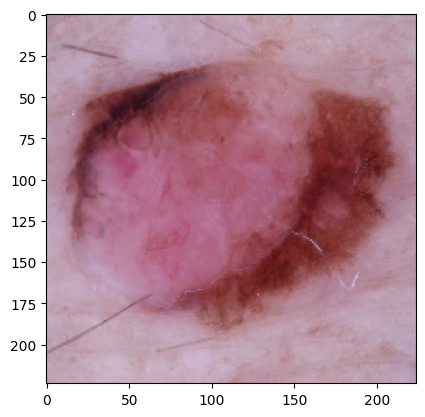

In [41]:
img_path = df_balanced['image_path'][16]

# Load image
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)  # Optional: display image

In [42]:
# Convert to array and preprocess
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 224, 224, 3)
img_array = img_array / 255.0  # Normalize if your model was trained on normalized image

In [43]:
# Predict
pred = model.predict(img_array)
predicted_index = np.argmax(pred)
confidence = np.max(pred) * 100
predicted_label = class_labels[predicted_index]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [44]:
# Output
print("Predicted Class:", predicted_label)
print(f"Confidence: {confidence:.2f}%")


Predicted Class: Vascular Lesion
Confidence: 93.68%
